Appendix

In [23]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re

In [45]:
#genre_dict line is to map the document with genre ID numbers but not numbers.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('imdb.title.basics.csv.gz')
df_gross=pd.read_csv('bom.movie_gross.csv.gz')
df_name_basics=pd.read_csv('imdb.name.basics.csv.gz')
df_title_akas=pd.read_csv('imdb.title.akas.csv.gz')
#df_budget=pd.read_csv('tn.movie_budgets.csv.gz')
df_TMDB=pd.read_csv('TMDB_cleaned.csv')
df_writers=pd.read_csv('Writersb.csv')
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 100)
Full = pd.read_csv("df_7.csv")

EDA
To help address the potential issue of the user ratings being biased when there were a low number of ratings, I considered creating high, medium, and low bands for the number of votes. I would base this on the distrubion of the data (above the 75th percentile, in the IQR, below 25th percentile). This approach was abandoned when I realized since my ultimate goal was a small set of data, and that I could use sorting to help with this potential issue.

Attempt at creating a new column for bands of the number of ratings. I feel this is missing a way to iterate through the rows. 
How to go about creating a new column that takes the numvalues column and determines if value is high, med, or low.

In [46]:
# df.insert(5, 'Num_bands', '')
# Create a new column = Num_bands
# for each value in numvotes:
#     if numvotes <= 198:
#         make Num_bands = 'low'
#     elif numvotes == >= 17596:
#         make Num_bands = 'high'
#     else:
#         make Num_bands = 'med'

# Alternate approach... duplicate the column and change the values in placce?

In [47]:
df_ratings.head()
df_ratings.sort_values(by='numvotes',ascending=False)
#Would like to get movie titles, genres, and studios in this table to make more useful conclusions.
#Filter out ones with low amounts of numvotes

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


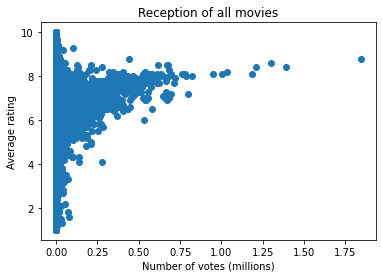

Correlation between ratings and other variables: 


numvotes         0.044478
averagerating    1.000000
Name: averagerating, dtype: float64

In [48]:
fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_ratings['numvotes']/1e6,df_ratings['averagerating'])
ax.set_xlabel('Number of votes (millions)')
ax.set_ylabel('Average rating')
ax.set_title('Reception of all movies')
plt.show()

df_ratings.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between ratings and other variables: ')
df_ratings.corr()['averagerating'].sort_values()

In [49]:
df_ratings.isna().any()

tconst           False
averagerating    False
numvotes         False
dtype: bool

In [50]:
#Great, no issues with that dataset we just viewed.

Though this did not help us directly with any of the business questions we addressed, here are
some correlation coefficients between variables we considered.

In [51]:
Full.corr()['averagerating'].sort_values(ascending=False)

averagerating      1.000000
vote_average       0.527792
numvotes           0.325257
runtime_minutes    0.311571
vote_count         0.297104
Documentary        0.288992
Drama              0.214633
Biography          0.207595
History            0.127970
Sport              0.088354
Music              0.081626
News               0.072147
Romance            0.064260
Adventure          0.063502
Animation          0.054603
Musical            0.035468
War                0.019037
Family             0.010955
start_year         0.007524
Comedy             0.004470
Crime              0.003219
Year              -0.007645
Fantasy           -0.012853
Mystery           -0.037975
death_year        -0.040309
Action            -0.056208
id                -0.068952
Sci-Fi            -0.079821
birth_year        -0.116843
Thriller          -0.204665
Horror            -0.364015
Name: averagerating, dtype: float64

In [ ]:
#genres=[]
#for f in df_ratings_basics:
#    for g in f.strip('[]').split(','):
#        if not g in genres:
#            genres.append(g)

Below are attempts to create a master file with all the columns we needed.

In [ ]:
#Merge the ratings and basics tables.
#df_ratings_basics=df_ratings.merge(df_basics, left_on='tconst',right_on='tconst')
#df_ratings_basics.head()
#Made these comments after running this (do not want this to happen every time we run this cell).

In [30]:
#df_budget_TMDB.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)
#Save as a csv to the desktop

In [31]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [32]:
#Another table merge.
#df_main_table=df_budget_TMDB.merge(df_ratings_basics,left_on='movie',right_on='primary_title')

In [33]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_main_table.csv', index = False, header=True)
#Making a main table with all the fields we need, converting to a csv file.

In [34]:
#df_main_table.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [35]:
#df_2=df_main_table.merge(df_writers,left_on='tconst',right_on='tconst')

In [36]:
#df_2.to_csv (r'/Users/jresis/Desktop/df_2.csv', index = False, header=True)

In [37]:
#df_gross_basics_3=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
#df_gross_basics_3.info()

In [38]:
#df_3=df_ratings_basics_3.merge(df_writers,left_on='tconst',right_on='tconst')

In [39]:
#df_4=df_writers.merge(df_writers,left_on='tconst',right_on='tconst')

In [40]:
#df_6=df_ratings_basics_new.merge(df_TMDB,left_on='primary_title',right_on='title')

In [41]:
#df_6.to_csv (r'/Users/jresis/Desktop/df_6.csv', index = False, header=True)

In [42]:
#df_7=df_6.merge(df_writers,left_on='tconst',right_on='tconst')

In [43]:
#df_7.to_csv (r'/Users/jresis/Desktop/df_7.csv', index = False, header=True)

In [ ]:
#df_7.isna().sum()

In [ ]:
#df_8=df_7.merge(df_profit_genre_ranked,left_on='tconst',right_on='tconst')

In [ ]:
#df_8.to_csv (r'/Users/jresis/Desktop/df_8.csv', index = False, header=True)

In [ ]:
#df_9=df_budget.merge(df_7,left_on='movie',right_on='title')

In [ ]:
#df_9.to_csv (r'/Users/jresis/Desktop/df_9.csv', index = False, header=True)